In [1]:
# 設好之後還要restart kernel 
import sys,os,os.path
os.environ['http_proxy']="http://proxy1.nou.edu.tw:3128"
os.environ['https_proxy']="http://proxy1.nou.edu.tw:3128"

In [2]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# load text data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [4]:
print(df["text"][1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [5]:
df.shape

(11314, 1)

In [6]:
# 計算字元數 (number of characters)
df['num_char'] = df['text'].str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120


In [7]:
# same but removing trailing white spaces
df['num_char'] = df['text'].str.strip().str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117


In [8]:
# 計算字數(number of words)
df['num_words'] = df['text'].str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


In [9]:
# same but removing trailing white spaces
df['num_words'] = df['text'].str.strip().str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


In [10]:
# 決定字彙(vocabulary)
df['num_vocab'] = df['text'].str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,96
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,103
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,220
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,97
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,140


In [11]:
# setting charaters to lower case before counting unique words

df['num_vocab'] = df['text'].str.lower().str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139


In [12]:
# 語句多元性(lexical diversity)
df['lexical_div'] = df['num_words'] / df['num_vocab']

df.head()

,text,num_char,num_words,num_vocab,lexical_div
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216


In [13]:
# 平均的字長度(average words length)
df['ave_word_length'] = df['num_char'] / df['num_words']

df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581,5.821138
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164


In [7]:
# 探索其他特徵的分布
import matplotlib.pyplot as plt

df['target'] = data.target

In [8]:
df['target']

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: target, Length: 11314, dtype: int32

In [9]:
df['target'].nunique()

20

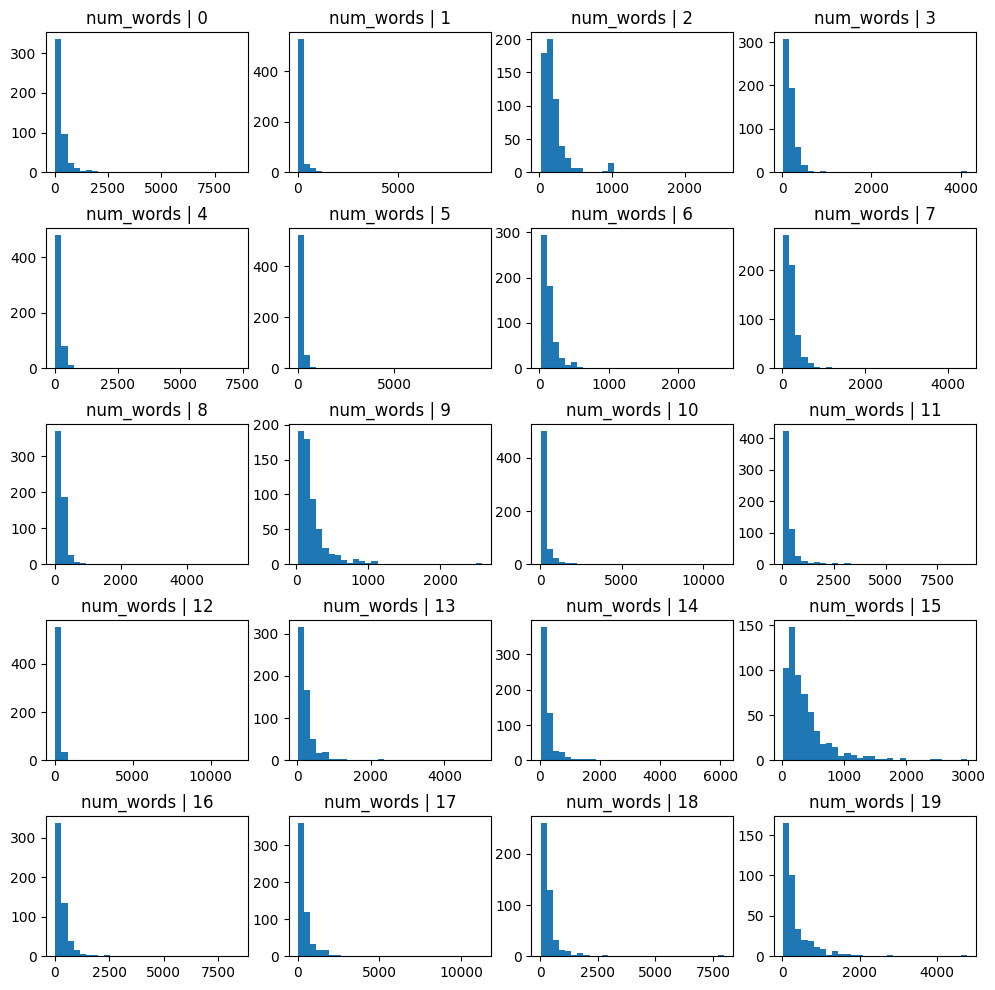

In [14]:
def plot_features(df, text_var):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target==n][text_var], bins=30)
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n += 1
    plt.show()
    
plot_features(df, 'num_words')